# Tokyo Housing Price Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
from ipywidgets import interactive
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 

In [2]:
df = pd.read_csv("./13.csv")
df = df[~df['Use'].isnull() & ~df['MinTimeToNearestStation'].isnull() & ~df['FloorPlan'].isnull() ]
df = df[df['Use'].str.contains('House')]

df_trade = df.filter(['Year','TradePrice'])
df_trade = df_trade.groupby('Year').mean()

df_station = df.filter(['MinTimeToNearestStation','TradePrice'])
df_station = df_station.groupby('MinTimeToNearestStation').mean()

In [3]:
df = df[df.TradePrice.between(df.TradePrice.quantile(.00), df.TradePrice.quantile(.95))]

## Data Extract

In [4]:
df.head(5)

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,1,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Not yet,NaN
6,7,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,3,3.0,...,NaN,NaN,Commercial Zone,80.0,700.0,4th quarter 2018,2018,4,Not yet,NaN
11,12,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,3,3.0,...,NaN,NaN,Commercial Zone,80.0,700.0,2nd quarter 2018,2018,2,Not yet,NaN
13,14,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,700.0,1st quarter 2018,2018,1,Done,NaN
16,17,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,3,3.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2017,2017,3,Not yet,NaN


## Correlation table of unfiltered data

In [5]:
df.corr()

,No,MunicipalityCode,MinTimeToNearestStation,MaxTimeToNearestStation,TradePrice,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,Frontage,FrontageIsGreaterFlag,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
No,1.000000,0.756031,0.355915,0.329952,-0.184755,0.304063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.114729,0.010327,NaN,-0.274259,-0.439289,-0.298846,0.029221
MunicipalityCode,0.756031,1.000000,0.345752,0.335617,-0.125809,0.311924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.074188,0.002573,NaN,-0.241635,-0.359028,-0.005091,0.004594
MinTimeToNearestStation,0.355915,0.345752,1.000000,0.934032,-0.051475,0.278902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.060429,-0.004717,NaN,-0.407904,-0.419866,-0.032983,0.003009
MaxTimeToNearestStation,0.329952,0.335617,0.934032,1.000000,-0.065539,0.242498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071306,-0.004650,NaN,-0.353892,-0.365173,-0.031838,0.003920
TradePrice,-0.184755,-0.125809,-0.051475,-0.065539,1.000000,0.608907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404813,0.000692,NaN,-0.081448,-0.013944,0.105264,-0.021689
Area,0.304063,0.311924,0.278902,0.242498,0.608907,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005656,0.002343,NaN,-0.335074,-0.319753,-0.024021,-0.015695
AreaIsGreaterFlag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PricePerTsubo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.filter(['MunicipalityCode','Use','BuildingYear','TradePrice','Year','MinTimeToNearestStation','FloorPlan','Area','FloorAreaRatio'])
df = df.reset_index()
del df['index']

## Correlation matrix after high correlation value columns have been removed

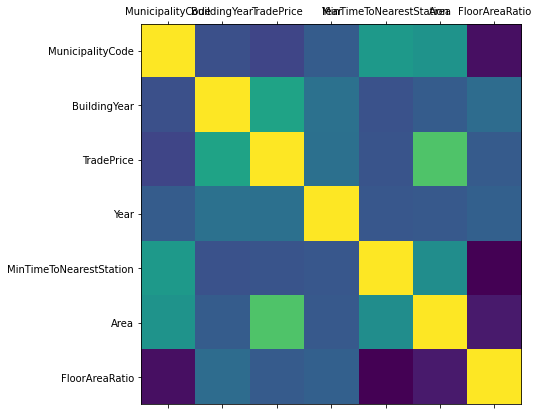

In [7]:
def plot_corr(df, size=7):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

## Descriptive methods (Clustering)

<AxesSubplot:title={'center':'Trade Price by Min Time to Nearest Station'}, xlabel='MinTimeToNearestStation'>

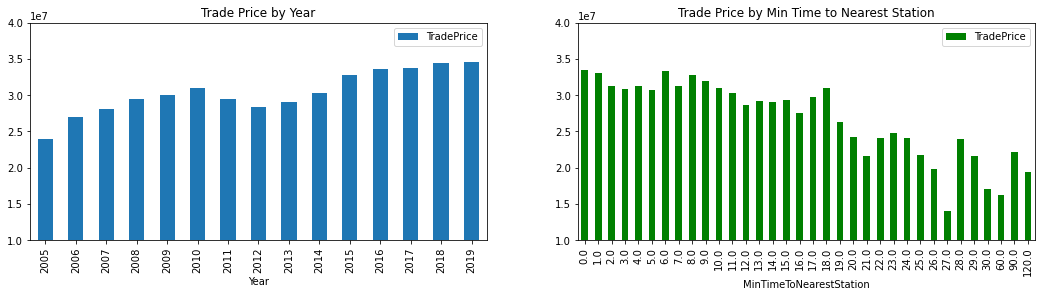

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(18,4))

df_trade.plot(kind='bar', ax=ax[0], ylim=[10000000,40000000], title='Trade Price by Year')

df_station.plot(kind='bar', ax=ax[1], xlim=[0,30], ylim=[10000000,40000000], title='Trade Price by Min Time to Nearest Station', color='g')


## Converting FloorPlan string into binary columns

In [9]:
df = pd.get_dummies(data=df, columns=['FloorPlan'])
df.head(5)

,MunicipalityCode,Use,BuildingYear,TradePrice,Year,MinTimeToNearestStation,Area,FloorAreaRatio,FloorPlan_1DK,FloorPlan_1DK+S,...,FloorPlan_5DK,FloorPlan_5LDK,FloorPlan_5LDK+S,FloorPlan_6DK,FloorPlan_6LDK,FloorPlan_6LDK+S,FloorPlan_7LDK,FloorPlan_Duplex,FloorPlan_Open Floor,FloorPlan_Studio Apartment
0,13101,House,2013.0,40000000,2019,4.0,30,500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13101,House,1985.0,24000000,2018,3.0,35,700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13101,House,1985.0,21000000,2018,3.0,25,700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13101,House,1982.0,45000000,2018,4.0,45,700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13101,House,2012.0,37000000,2017,3.0,45,500.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#feature_col_names = ['Year','MunicipalityCode','FloorPlan','MinTimeToNearestStation','Area','FloorAreaRatio']
feature_col = df.drop(['TradePrice','Use'], axis=1)
predicted_class_names = ['TradePrice']

X = feature_col
y = df[predicted_class_names].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=8)

## Verifying the split ratio

In [11]:
print('Test/train split percentage:')
print()
print((len(X_train)/len(df.index)) * 100)
print((len(X_test)/len(df.index)) * 100)
print()
print('Test/train split volume:')
print()
print(len(X_train))
print(len(X_test))
print()

Test/train split percentage:

69.99980103330039
30.00019896669961

Test/train split volume:

105545
45234



In [12]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values = np.nan, strategy = "mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Testing the r2 value of the prediction accuracy after imputation and scaling

In [14]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train.ravel())
regressor.score(X_test,y_test)

0.8589252087268017

In [15]:
y_pred = regressor.predict(X_test)
#print(y_pred)

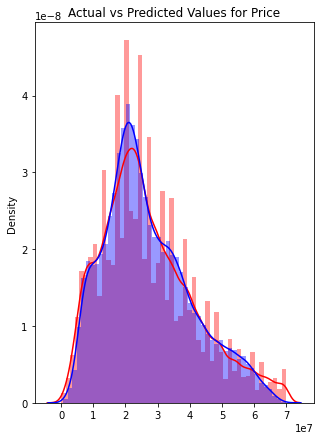

In [16]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_train, color="r", label="Actual Value")
sns.distplot(y_pred, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Price')


plt.show()
plt.close()